In [ ]:
# install required libraries


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.spatial import cKDTree
import gc
import glob
import os

In [ ]:
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Load the weather data as a csv
weather_path = '/content/drive/MyDrive/0.Data science final project/Weather Data/weather_data.csv'
weather_data = pd.read_csv(weather_path)

In [ ]:
# Load the fire data
fire_path = '/content/drive/MyDrive/0.Data science final project/NASA Fire data/fire_data_target.csv'
fire_data = pd.read_csv(fire_path)

<ipython-input-10-eac02fcc7941>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_data = pd.read_csv(fire_path)


In [ ]:
fire_data['type'] = fire_data['type'].fillna('No type available')

In [ ]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588502 entries, 0 to 588501
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   latitude              588502 non-null  float64
 1   longitude             588502 non-null  float64
 2   brightness            588502 non-null  float64
 3   scan                  588502 non-null  float64
 4   track                 588502 non-null  float64
 5   acq_date              588502 non-null  object 
 6   acq_time              588502 non-null  int64  
 7   satellite             588502 non-null  object 
 8   instrument            588502 non-null  object 
 9   confidence            588502 non-null  object 
 10  bright_t31            588502 non-null  float64
 11  frp                   588502 non-null  float64
 12  daynight              588502 non-null  object 
 13  type                  588502 non-null  object 
 14  frp_brightness_ratio  588502 non-null  float64
 15  

In [ ]:
# Change the acq_time column into hours and minutes and then match the format with the weather data
def split_time_column(fire_data):
    """Splits the 'time' column into 'hour' and 'minute' columns."""

    fire_data['hour'] = (fire_data['acq_time'] // 100).astype(int)
    fire_data['minute'] = (fire_data['acq_time'] % 100).astype(int)
    return fire_data

fire_data = split_time_column(fire_data)

In [ ]:
# Drop acq_time column from the fire data
fire_data = fire_data.drop('acq_time', axis=1)

In [ ]:
# Drop minute column as the ERA5 dataset is hourly data - NOTE - this will lose some precision in the data
# Another option is to round to the nearest hour. This will also reduce the precision of the measurement
fire_data = fire_data.drop('minute', axis=1)

In [ ]:
# Clean the weather data so that the time column matches the same format as the fire data
# Split the date column into date and hour
# convert date column into datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data[('date_only')] = weather_data['date'].dt.date

In [ ]:
# rename acq_date column in fire data set to date
fire_data = fire_data.rename(columns={'acq_date': 'date'})
# rename hour column to time
fire_data = fire_data.rename(columns={'hour': 'time'})

# Convert date column into datetime
fire_data['date'] = pd.to_datetime(fire_data['date'])

In [ ]:
# drop column date from weather dataset
weather_data = weather_data.drop('date', axis=1)

#rename date only column to date
weather_data = weather_data.rename(columns={'date_only': 'date'})

In [ ]:
fire_data.head()

latitude  longitude  brightness  scan  track       date satellite  \
0  36.28835 -120.25271      298.26  0.42   0.45 2024-03-10     SUOMI   
1  36.27491 -120.24533      304.08  0.42   0.45 2024-03-10     SUOMI   
2  36.27073 -120.24596      301.97  0.42   0.45 2024-03-10     SUOMI   
3  34.62195 -117.10254      310.34  0.43   0.38 2024-03-10     SUOMI   
4  34.60886 -117.33659      308.74  0.44   0.39 2024-03-10     SUOMI   

  instrument confidence  bright_t31   frp daynight                      type  \
0      VIIRS          n      269.44  0.80        N  Presumed Vegetation Fire   
1      VIIRS          n      270.10  0.89        N  Presumed Vegetation Fire   
2      VIIRS          n      268.92  0.89        N  Presumed Vegetation Fire   
3      VIIRS          n      280.16  1.33        N  Presumed Vegetation Fire   
4      VIIRS          n      280.24  1.39        N  Presumed Vegetation Fire   

   frp_brightness_ratio day_of_week  time  
0              0.002682      Sunday     9  
1              0.002927      Sunday     9  
2              0.002947      Sunday     9  
3              0.004286      Sunday     9  
4              0.004502      Sunday     9

In [ ]:
weather_data.head()

time  latitude  longitude  eastward_wind  northward_wind  temperature  \
0     0     48.75    -116.50       0.329315        2.819519    273.65796   
1     0     48.75    -124.50      -0.557404        2.734558    274.10913   
2     0     48.75    -122.50      -1.852325        3.740417    277.51930   
3     0     48.75    -122.75      -3.162872        5.892761    277.97240   
4     0     48.75    -123.00      -3.583771        6.359558    278.22827   

         date  
0  2024-03-01  
1  2024-03-01  
2  2024-03-01  
3  2024-03-01  
4  2024-03-01

In [ ]:
fire_data.dtypes

latitude                       float64
longitude                      float64
brightness                     float64
scan                           float64
track                          float64
date                    datetime64[ns]
satellite                       object
instrument                      object
confidence                      object
bright_t31                     float64
frp                            float64
daynight                        object
type                            object
frp_brightness_ratio           float64
day_of_week                     object
time                             int64
dtype: object

In [ ]:
weather_data.dtypes

time                int64
latitude          float64
longitude         float64
eastward_wind     float64
northward_wind    float64
temperature       float64
date               object
dtype: object

In [ ]:
# Save cleaned fire and weather data into drive
fire_data.to_csv('/content/drive/MyDrive/0.Data science final project/firms_data_cleaned.csv', index=False)
weather_data.to_csv('/content/drive/MyDrive/0.Data science final project/weather_data_cleaned.csv', index=False)

In [ ]:
# Load the fire and weather cleaned data
fire_path = '/content/drive/MyDrive/0.Data science final project/Fire Weather combined/firms_data_cleaned.csv'
fire_data = pd.read_csv(fire_path)

weather_path = '/content/drive/MyDrive/0.Data science final project/Fire Weather combined/weather_data_cleaned.csv'
weather_data = pd.read_csv(weather_path)

In [ ]:
# inverse distance weighting to match fire data with weather features
# IDW calculates weights based on distance between fire events and weather data points (coordinates and time)


# num neighbours is the number of nearest data points to consider - increasing this number makes interpolation smoother, but increases computation
# power is the inverse distance weighting power - increasing power makes less influence on other neighbours, more local detail
# Matches fire data to ERA5 data using IDW with date, hour, lat, and lon


# Changing number of neighbours and power to determine which model will perform the best
# Changing n values between 4 and 20, and p=2,3
def match_fire_era5_idw(fire_data, weather_data, num_neighbors, power, output_path):

    scaling_factor = 1000000

    # Scale date values
    weather_data['date'] = pd.to_datetime(weather_data['date'])
    fire_data['date'] = pd.to_datetime(fire_data['date'])
    weather_data['scaled_date'] = (weather_data['date'].values.astype(np.int64) // 10**9) / scaling_factor
    fire_data['scaled_date'] = (fire_data['date'].values.astype(np.int64) // 10**9) / scaling_factor

    # Creating a KD tree
    weather_target = np.column_stack((
        weather_data['latitude'].values,
        weather_data['longitude'].values,
        weather_data['time'].values,
        weather_data['scaled_date'].values
    ))
    tree = cKDTree(weather_target)

    # Query the KD tree
    fire_target = np.column_stack((
        fire_data['latitude'].values,
        fire_data['longitude'].values,
        fire_data['time'].values,
        fire_data['scaled_date'].values
    ))
    distances, indices = tree.query(fire_target, k=num_neighbors)

    # IDW calculation
    matched_weather = pd.DataFrame()

    total_fire_events = len(fire_data)

    for col in weather_data.columns:
        if col not in ['latitude', 'longitude', 'time', 'date', 'scaled_date']:
            weighted_values = []
            for i in range(len(fire_data)):
                if (i + 1) % 100 == 0:
                    print(f"Processing fire event {i + 1} of {total_fire_events}")
                if np.inf in distances[i]:
                    if np.all(np.isinf(distances[i])):
                        weighted_values.append(np.nan)
                    else:
                        valid_neighbors = ~np.isinf(distances[i])
                        valid_distances = distances[i][valid_neighbors]
                        valid_indices = indices[i][valid_neighbors]
                        weights = 1 / (valid_distances ** power)
                        weighted_sum = np.sum(weather_data[col].values[valid_indices] * weights)
                        total_weight = np.sum(weights)
                        weighted_values.append(weighted_sum / total_weight)
                else:
                    weights = 1 / (distances[i] ** power)
                    weighted_sum = np.sum(weather_data[col].values[indices[i]] * weights)
                    total_weight = np.sum(weights)
                    weighted_values.append(weighted_sum / total_weight)
            matched_weather[f'era5_{col}'] = weighted_values

    combined_data = pd.concat([fire_data.reset_index(drop=True), matched_weather], axis=1)

    # Save to Google Drive
    combined_data.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")

    return combined_data



# Apply the function to the entire fire_data and save to Google Drive
output_file_path = '/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n100p2.csv' # ensure output file name is recognisable
n100_p2 = match_fire_era5_idw(fire_data, weather_data, num_neighbors=100, power=2, output_path=output_file_path)

#print(n12_p3.head())

In [ ]:
# Since the model was run with different combinations of n and p... the model performance needs to be evaluated to dteremine which combination should be used
# Load all the models
n4p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n4p2.csv')
n8p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n8p2.csv')
n8p3 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n8p3.csv')
n12p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n12p2.csv')
n12p3 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n12p3.csv')
n16p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n16p2.csv')
n16p3 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n16p3.csv')
n20p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n20p2.csv')
n20p3 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n20p3.csv')
n50p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n50p2.csv')
n50p5 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n50p2.csv')
n100p2 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n100p2.csv')
n100p5 = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/combined_fire_weather_n100p5.csv')

In [ ]:
# Create histograms to compare the distribution of weather variables
variables = (['era5_eastward_wind', 'era5_northward_wind', 'era5_temperature'])

In [ ]:
# Store the datasets inside a list
datasets = [n4p2, n8p2, n8p3, n12p2, n12p3, n16p2, n16p3, n20p2, n20p3, n50p2, n50p5, n100p2, n100p5]
dataset_names = ['n4p2', 'n8p2', 'n8p3', 'n12p2', 'n12p3', 'n16p2', 'n16p3', 'n20p2', 'n20p3', 'n50p2', 'n50p5', 'n100p2', 'n100p5']

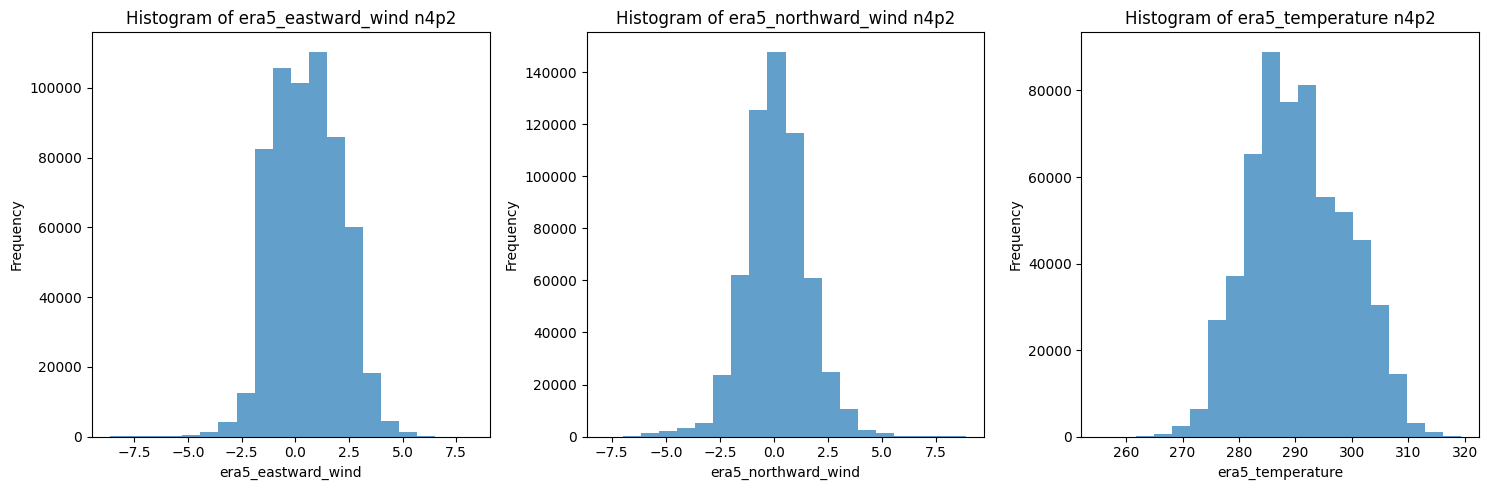

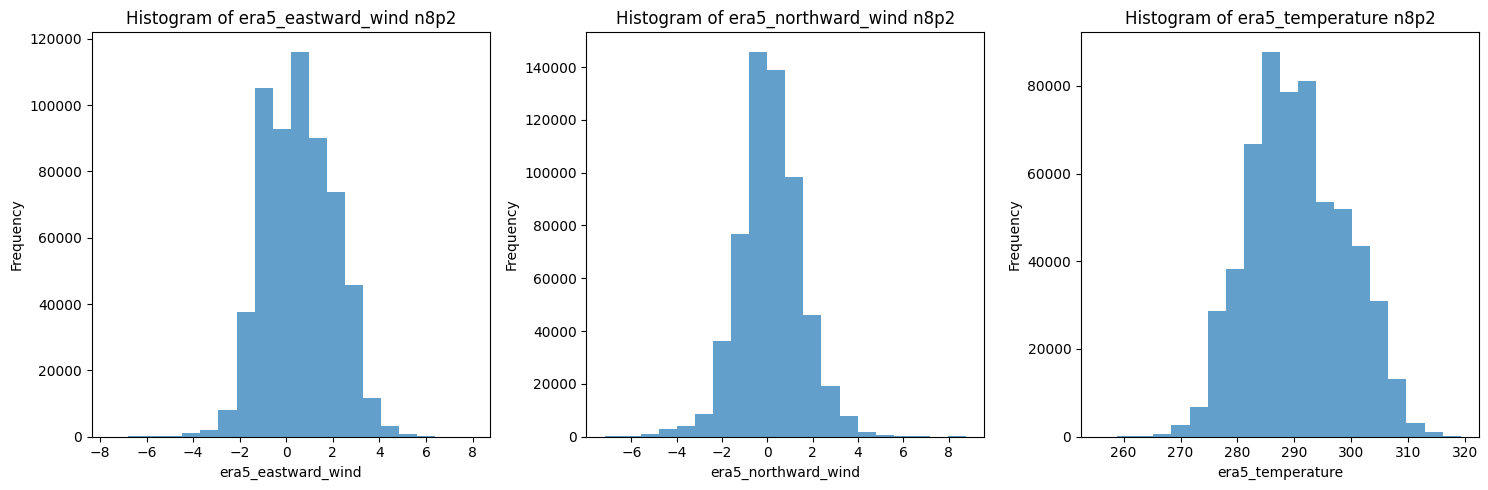

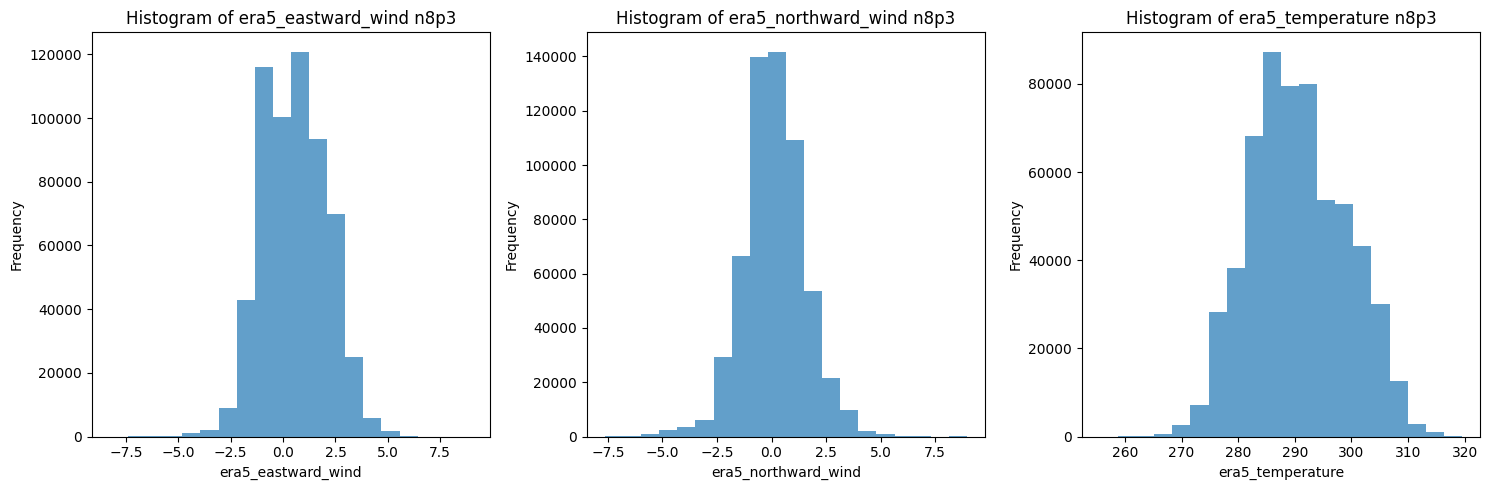

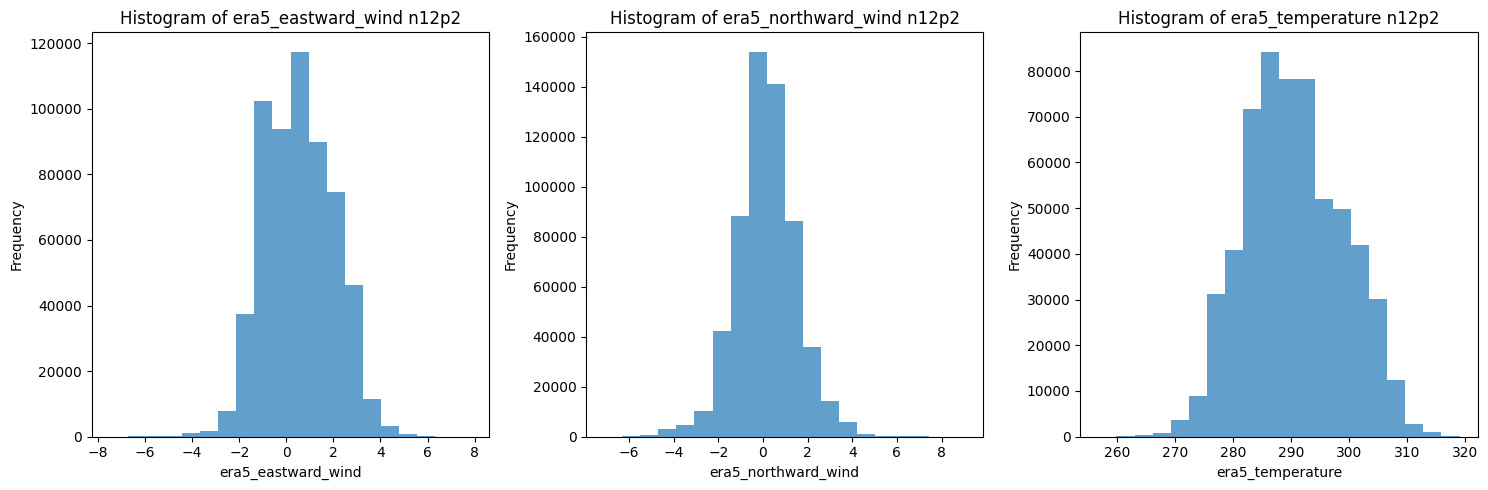

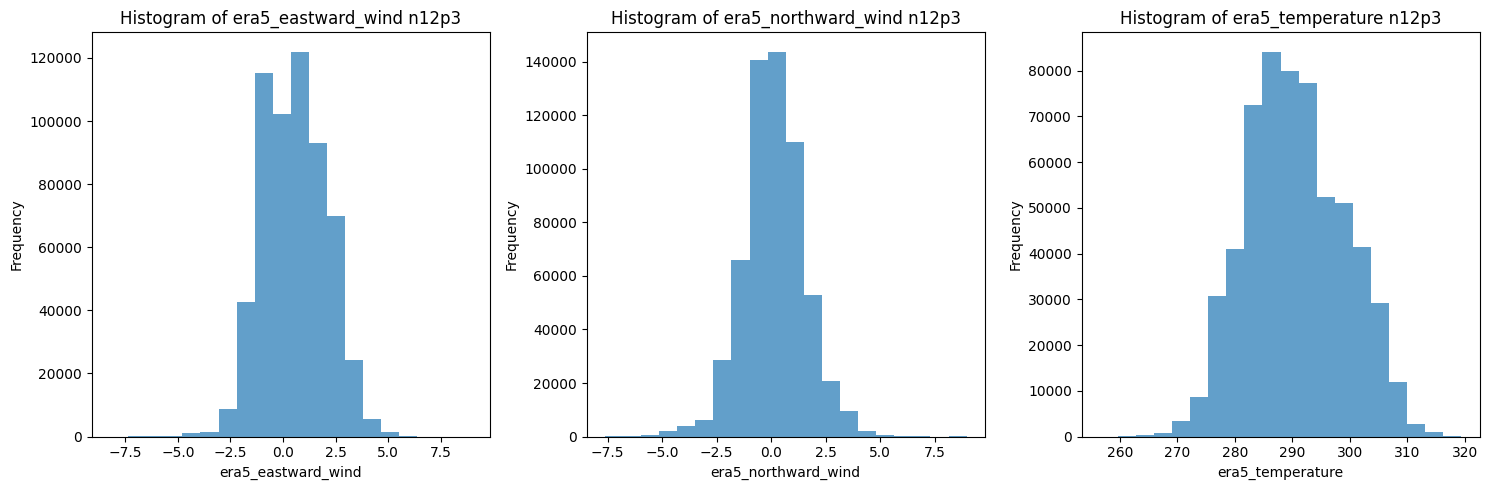

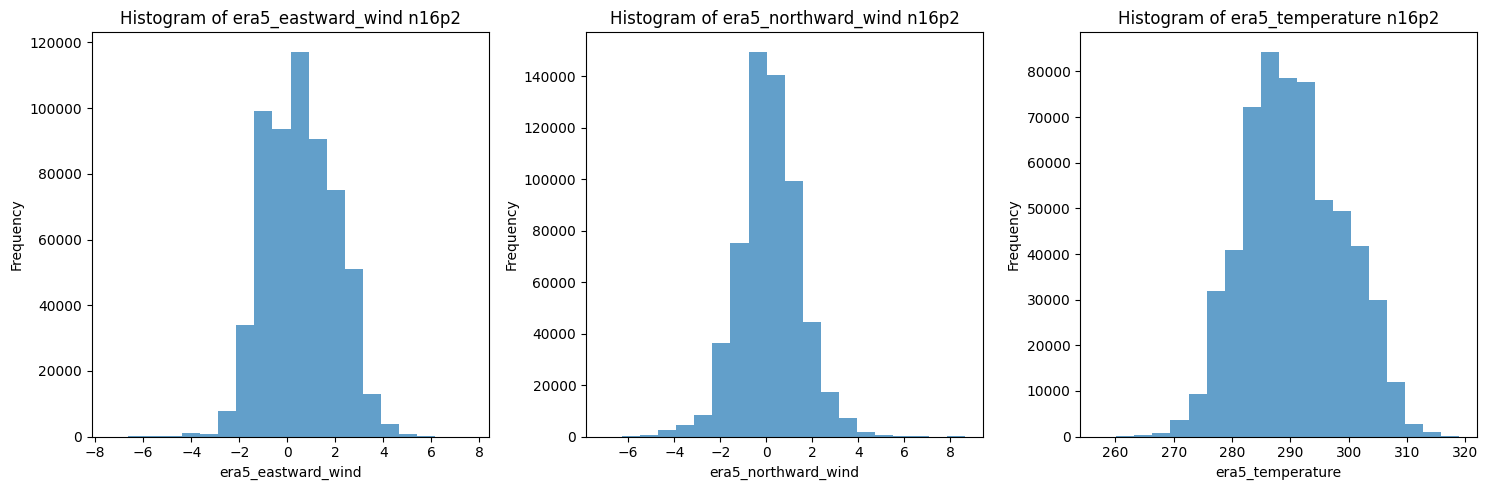

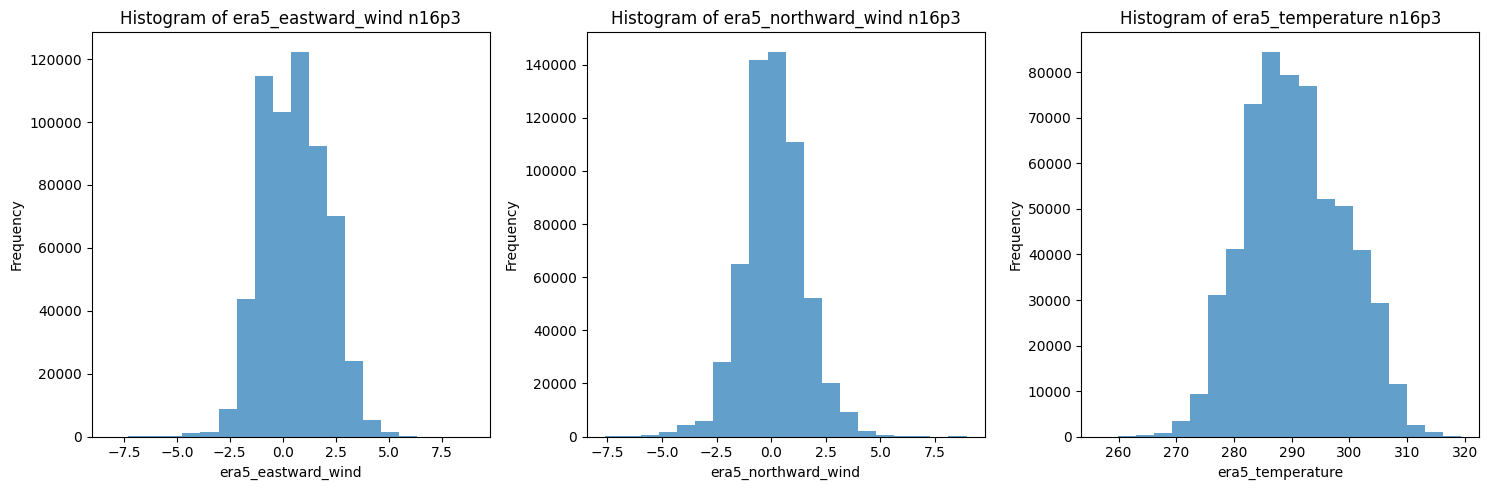

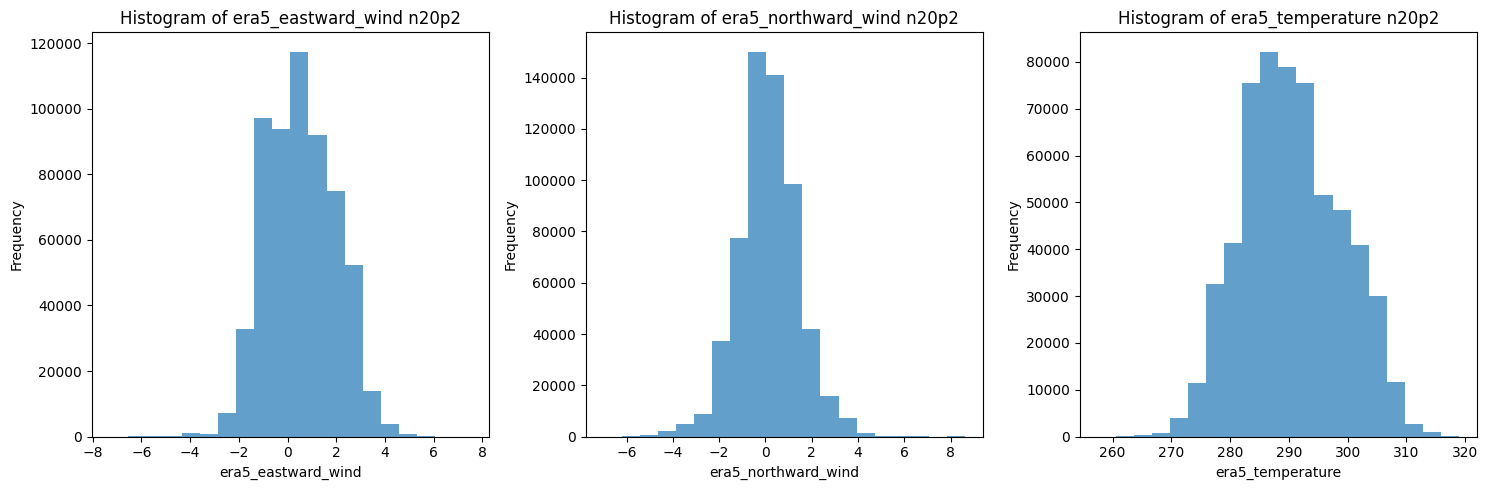

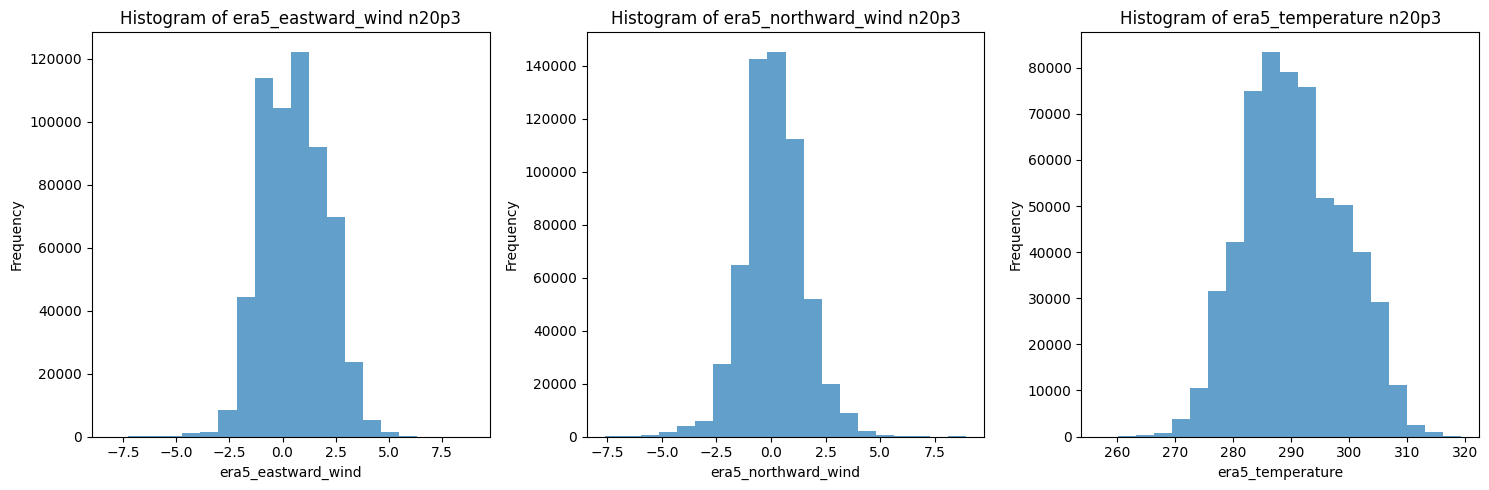

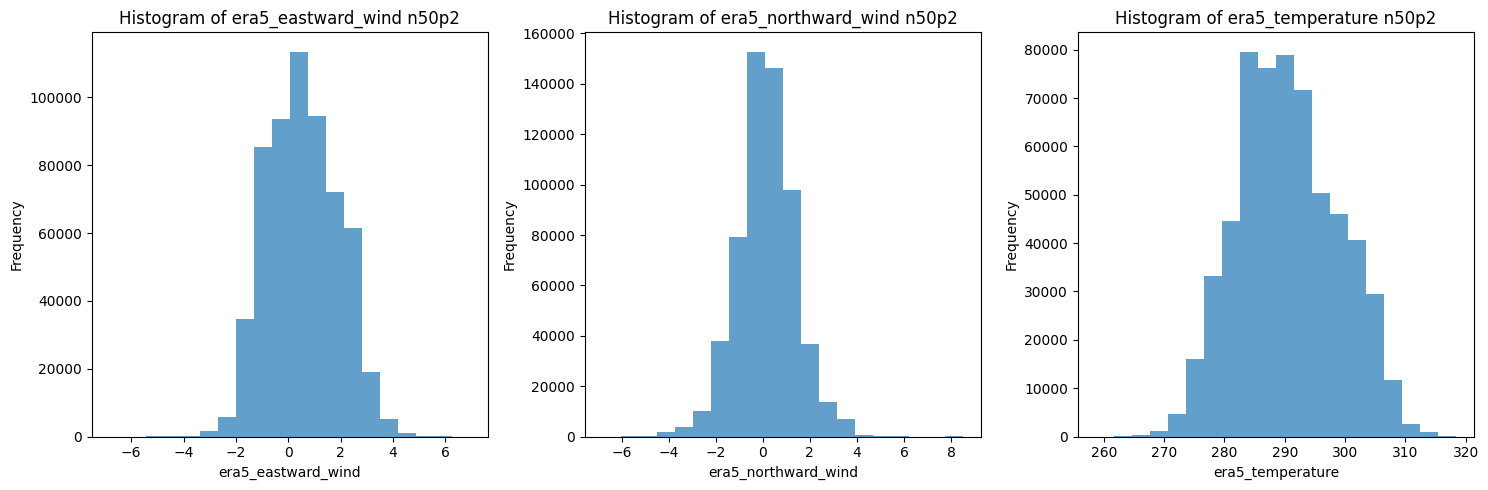

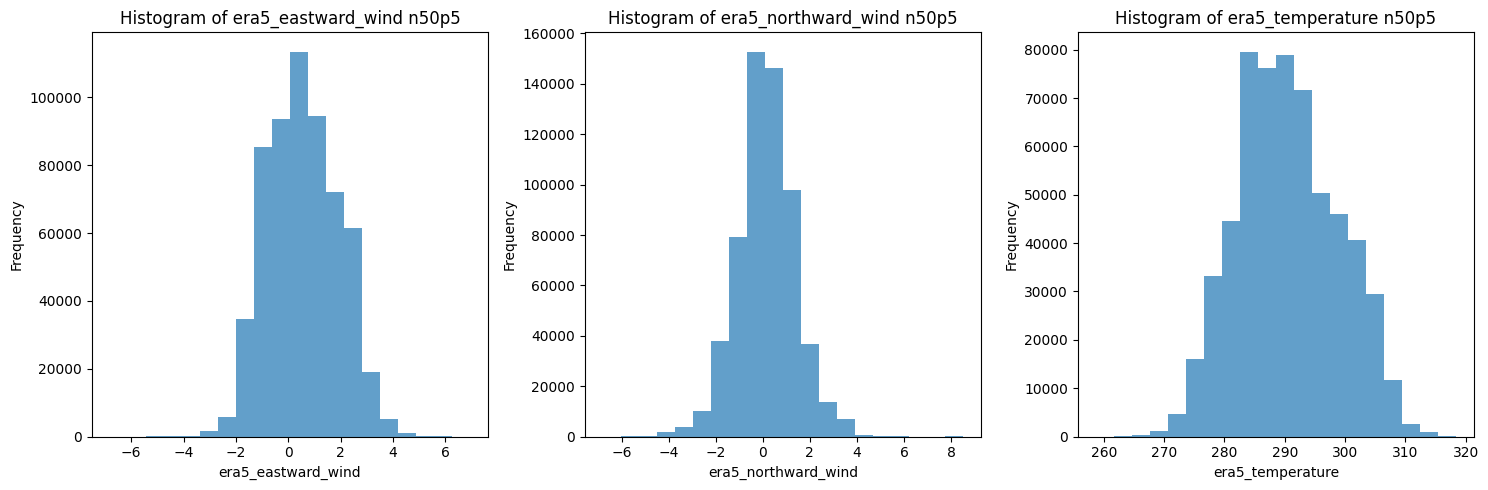

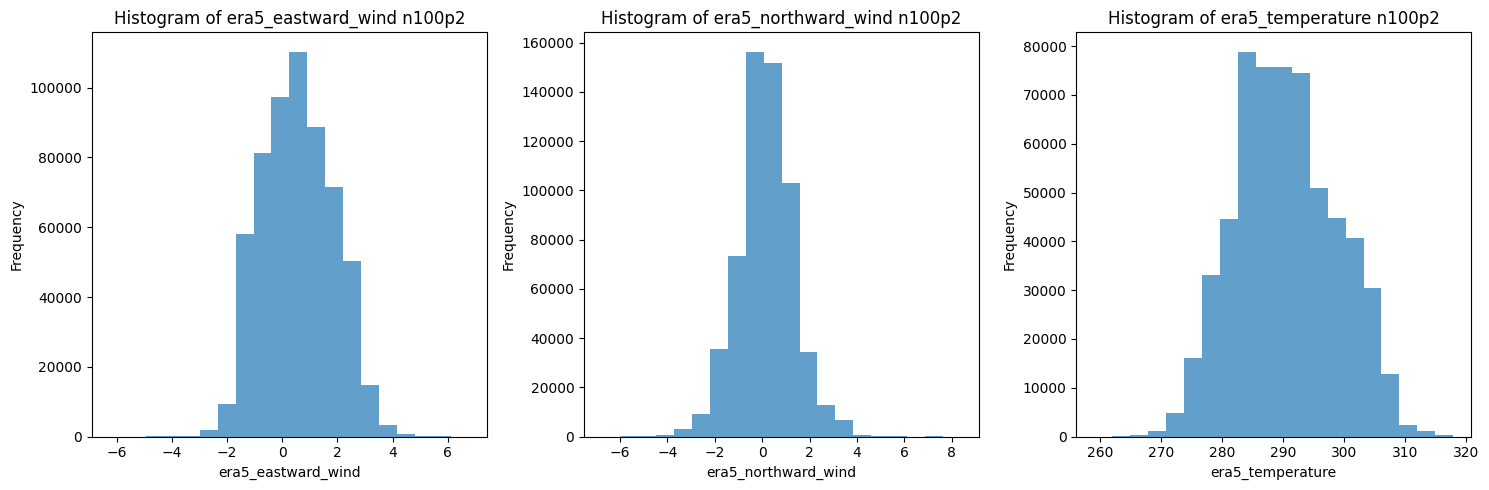

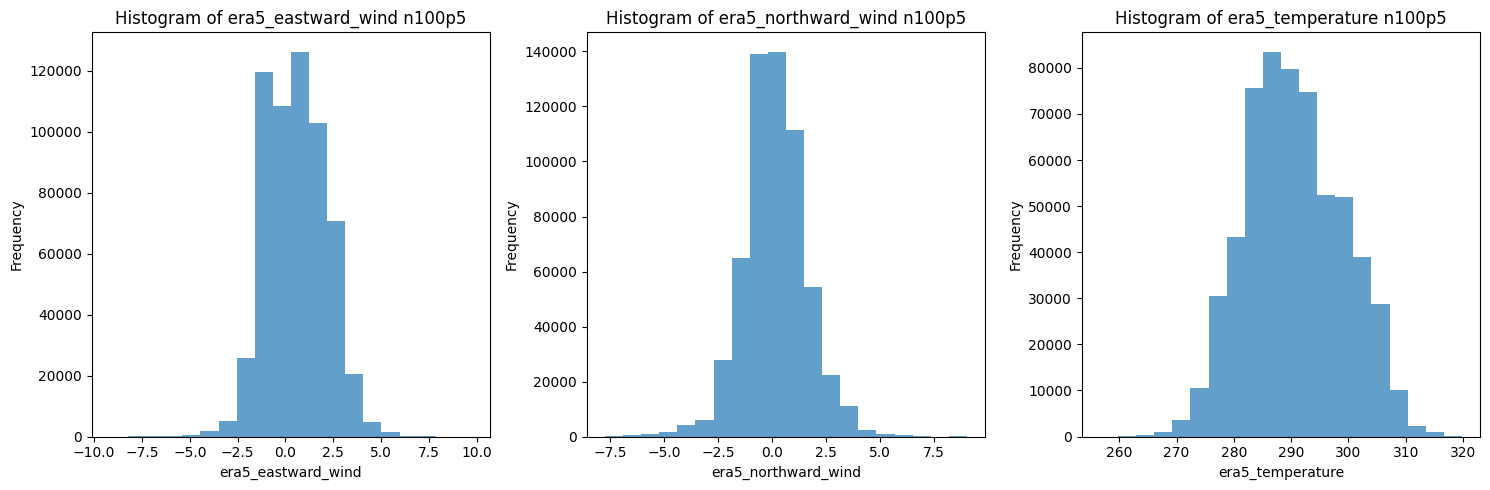

In [ ]:
# Create a loop to loop through each of the datasets and plot histograms for the variables stored in the variable list
for dataset, dataset_name in zip(datasets, dataset_names):
    fig, axes = plt.subplots(1, len(variables), figsize=(15, 5))  # Create subplots

    for i, variable in enumerate(variables):
        axes[i].hist(dataset[variable], bins=20, alpha=0.7)
        axes[i].set_title(f'Histogram of {variable} {dataset_name}')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

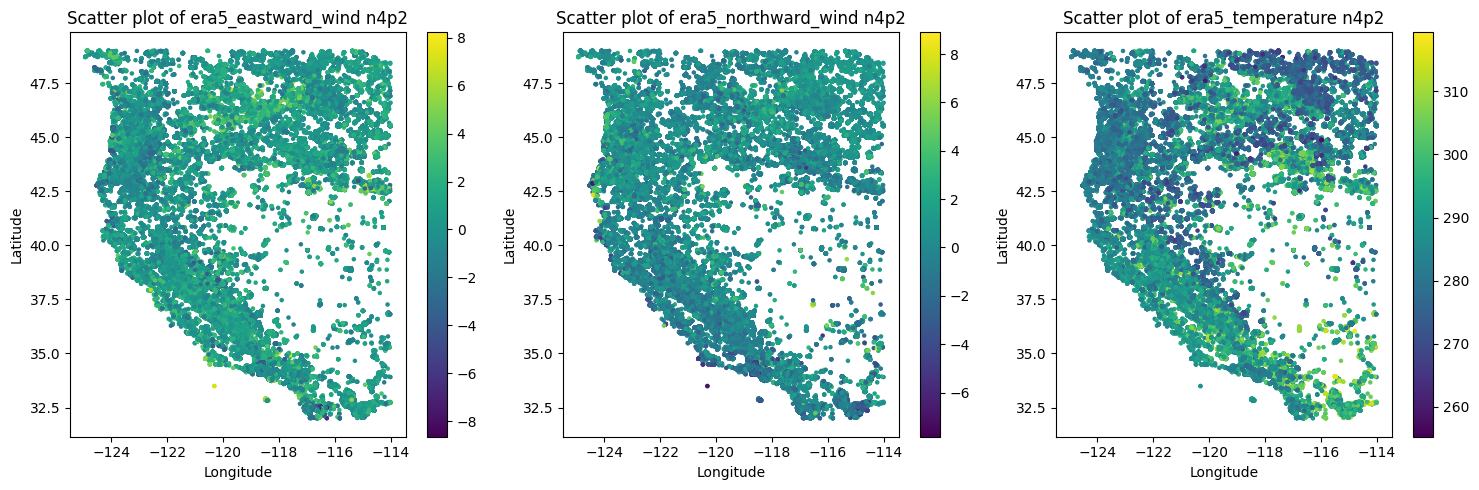

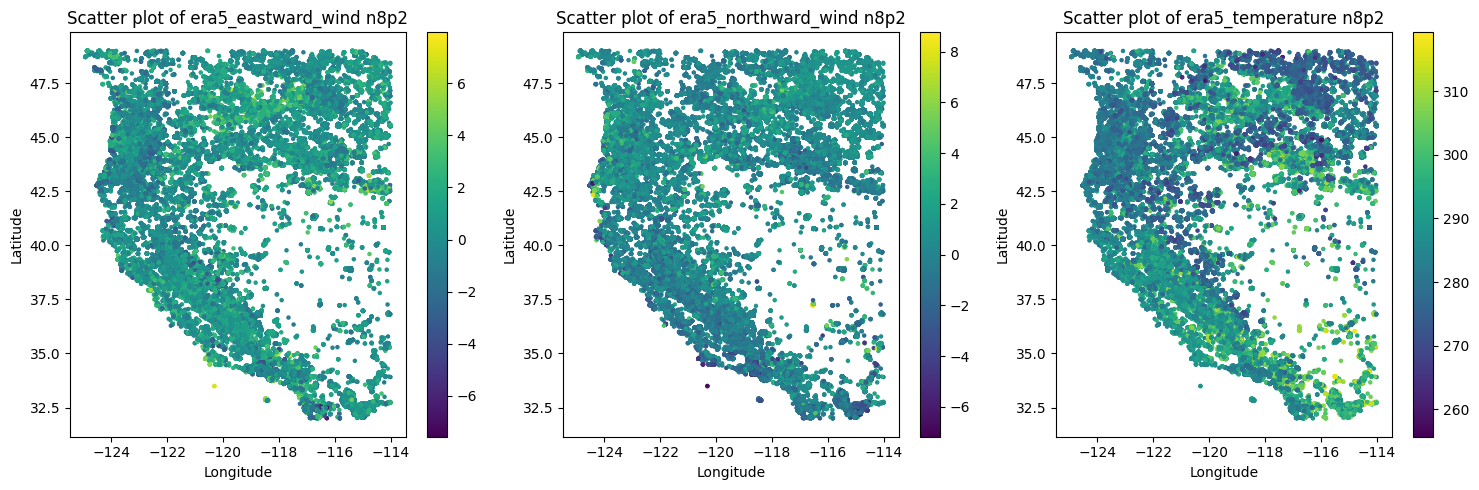

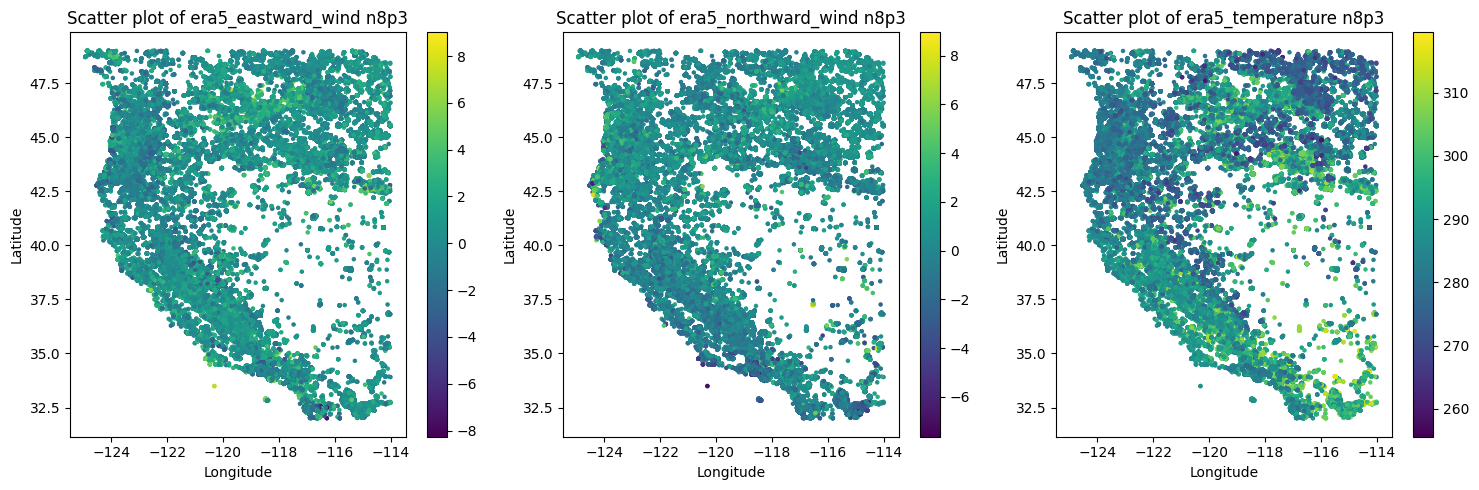

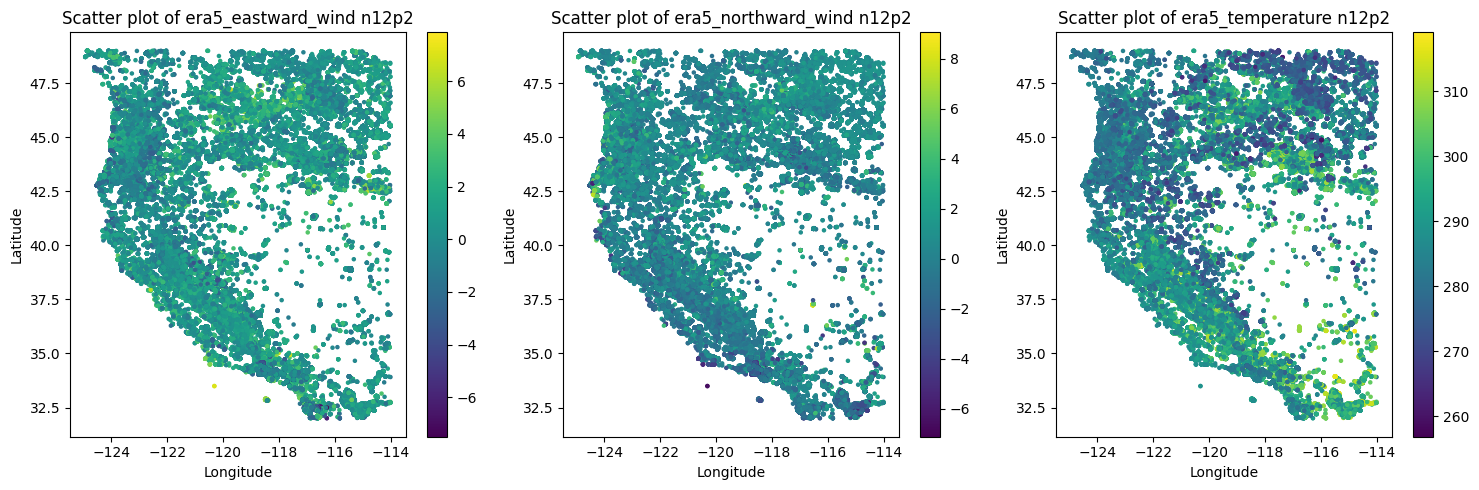

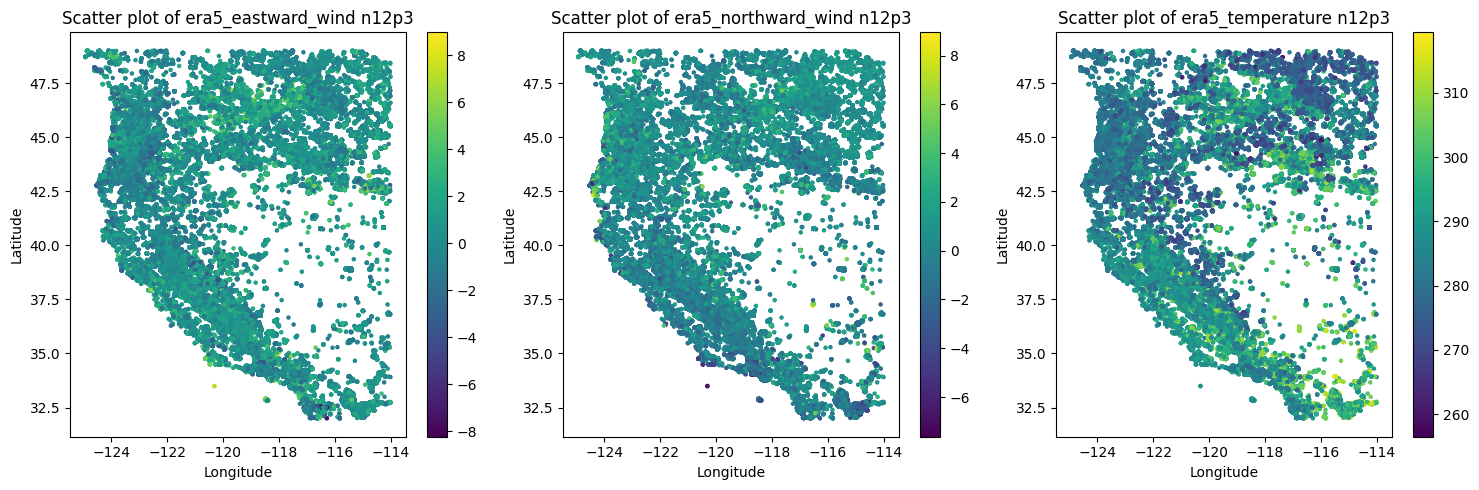

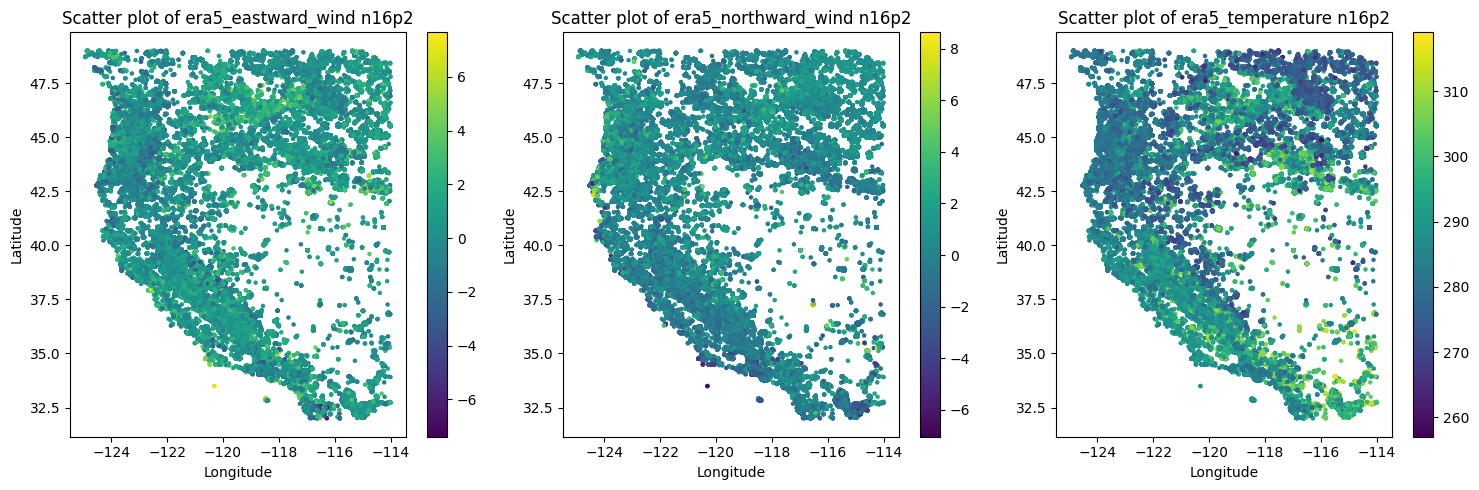

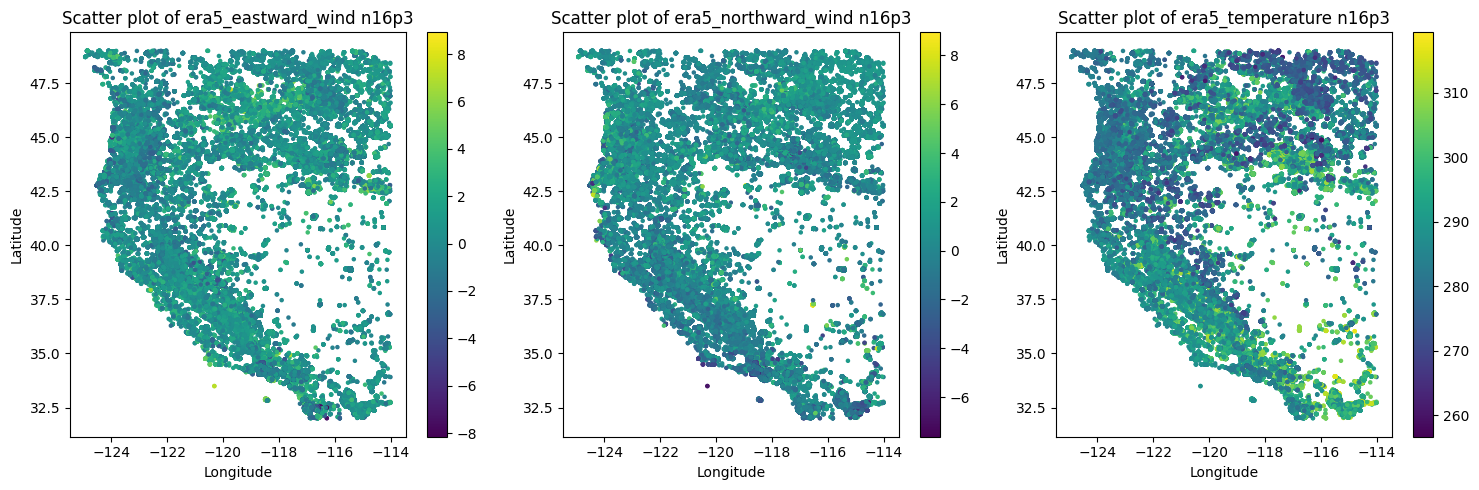

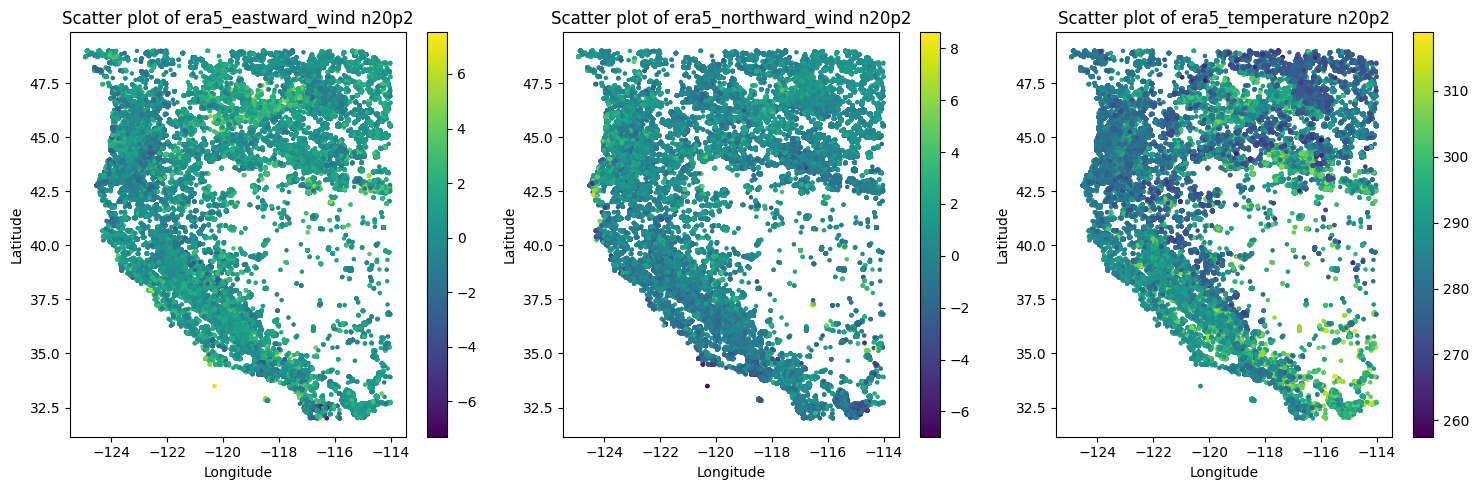

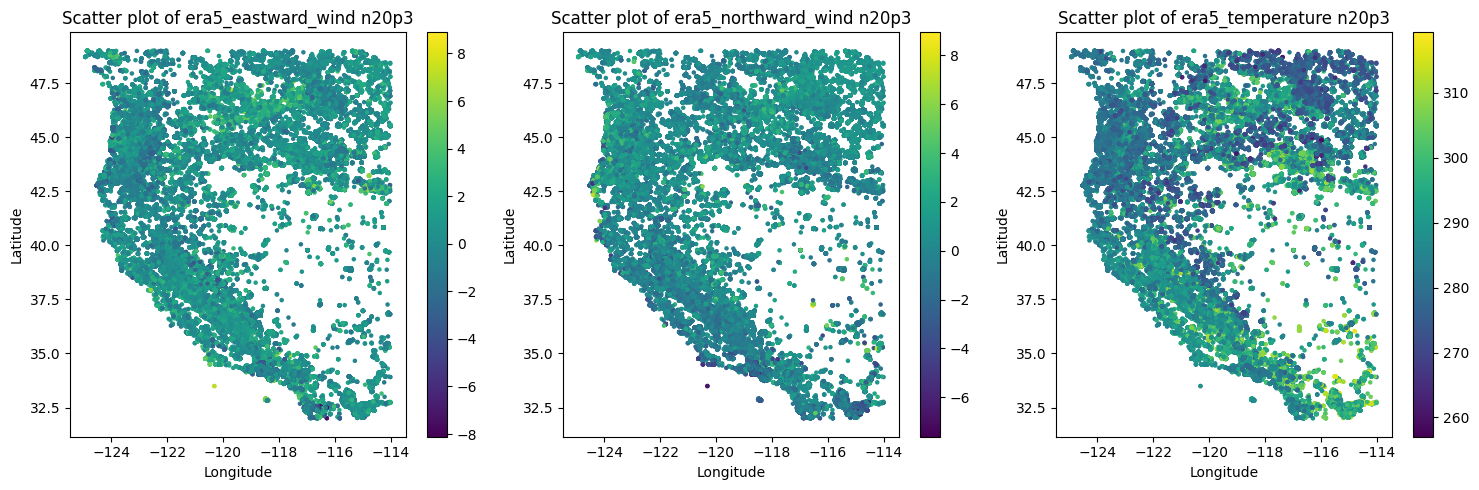

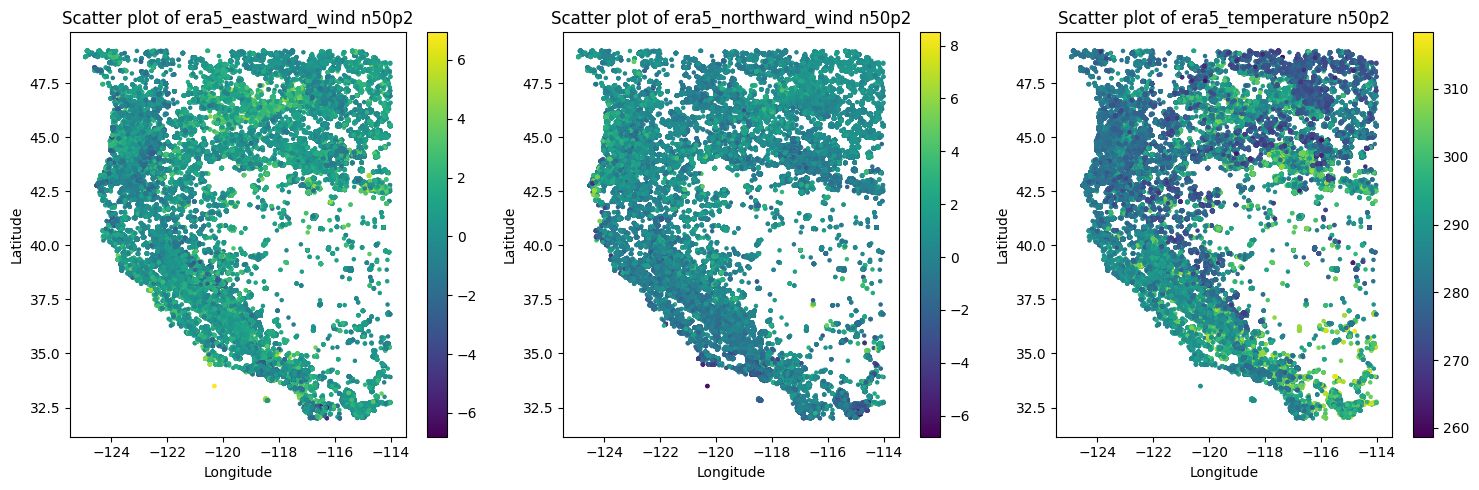

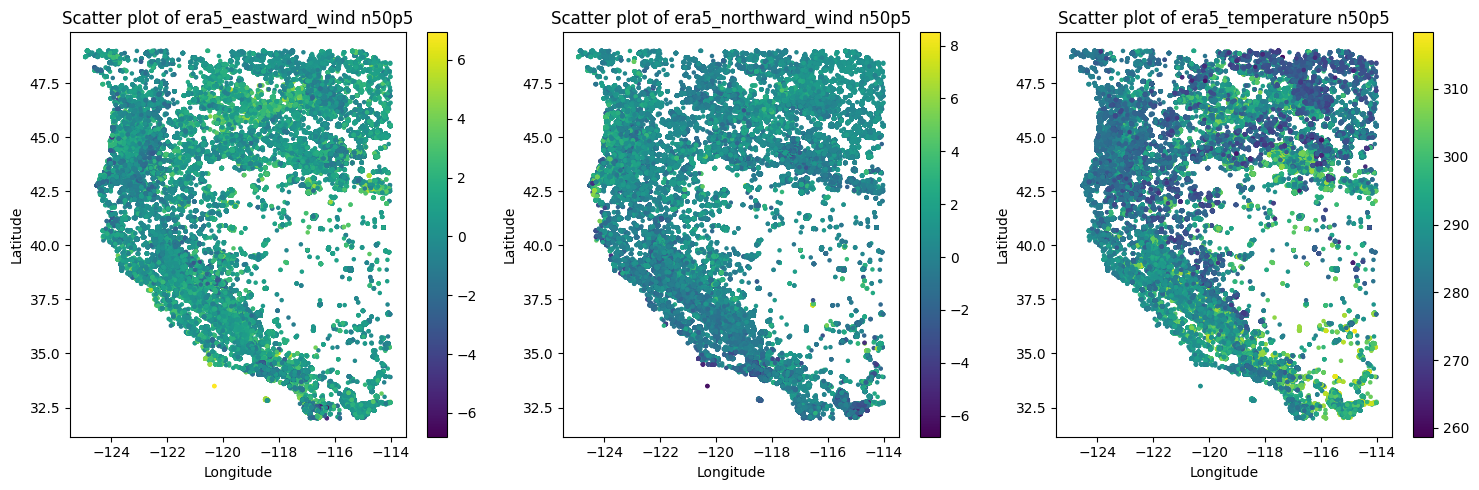

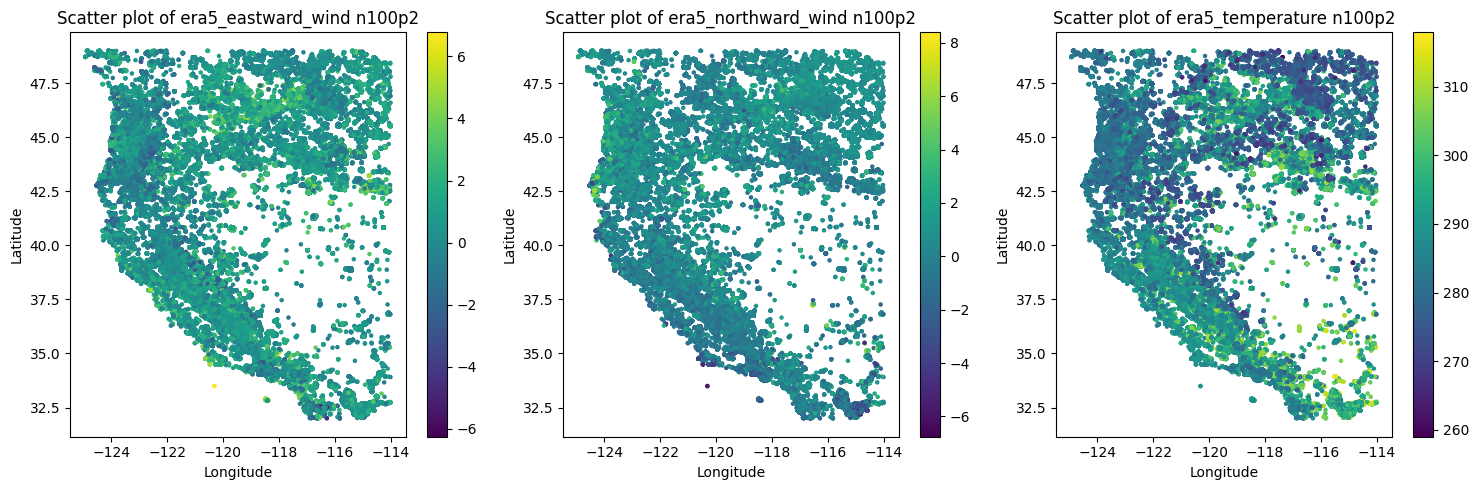

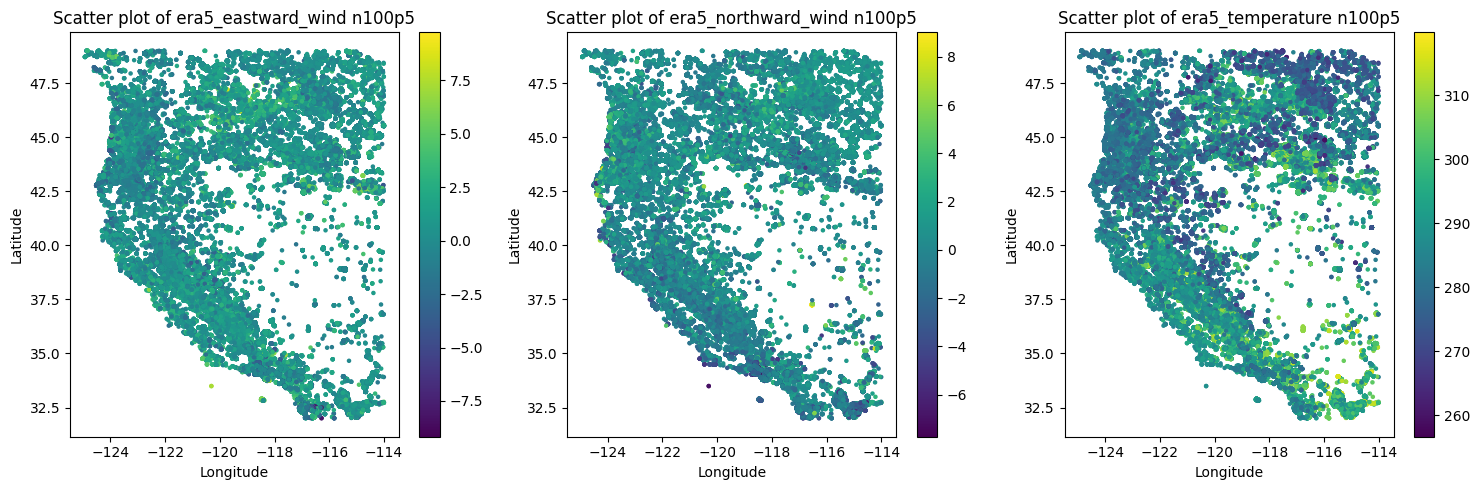

In [ ]:
# Create a loop to loop through each of the datasets and plot a scatter for the variables stored in the variable list, on a plot of lat/long
for dataset, dataset_name in zip(datasets, dataset_names):
    fig, axes = plt.subplots(1, len(variables), figsize=(15, 5))  # Create subplots

    for i, variable in enumerate(variables):
        axes[i].scatter(dataset['longitude'], dataset['latitude'], c=dataset[variable], cmap='viridis', s=5)
        axes[i].set_title(f'Scatter plot of {variable} {dataset_name}')
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')
        plt.colorbar(axes[i].collections[0], ax=axes[i]) # Adding colorbar

    plt.tight_layout()
    plt.show()

In [ ]:
# Perform statistical analysis on the datasets
# Datasets have been narrowed down to n20p2, n50p2 and n100p2 as it presents the most normal distribution out of all the datasets
# as N increases, standard deviation decsrease, meaning that increasing N creates smoother results.
# I am choosing N=20 as this retins the best local variability
n20p2.describe()


latitude      longitude     brightness           scan  \
count  588502.000000  588502.000000  588502.000000  588502.000000   
mean       42.441721    -118.660449     327.485722       0.552084   
std         4.020046       2.611640      22.716401       0.401031   
min        32.001000    -124.931980     207.380000       0.320000   
25%        40.157378    -120.794500     307.092500       0.400000   
50%        44.142830    -118.910805     327.500000       0.450000   
75%        44.935620    -116.095840     344.180000       0.540000   
max        48.999750    -114.000000     509.500000       4.800000   

               track     bright_t31            frp  frp_brightness_ratio  \
count  588502.000000  588502.000000  588502.000000         588502.000000   
mean        0.543657     293.455336      22.972428              0.064244   
std         0.235824      14.133239     100.018190              0.240724   
min         0.360000     233.420000       0.000000              0.000000   
25%         0.380000     284.900000       1.930000              0.006198   
50%         0.470000     290.570000       4.900000              0.014862   
75%         0.610000     300.050000      15.000000              0.043832   
max         2.000000     400.100000   12423.700000             24.847400   

                time    scaled_date  era5_eastward_wind  era5_northward_wind  \
count  588502.000000  588502.000000       588502.000000        588502.000000   
mean       13.634722    1724.482704            0.551638             0.137998   
std         5.544506       4.668853            1.410129             1.304346   
min         3.000000    1710.028800           -7.291274            -6.978286   
25%         9.000000    1721.865600           -0.571606            -0.634456   
50%        10.000000    1724.025600            0.506607             0.118597   
75%        20.000000    1725.926400            1.589152             0.938077   
max        23.000000    1741.478400            7.526271             8.620921   

       era5_temperature  
count     588502.000000  
mean         290.548125  
std            8.427147  
min          257.505365  
25%          284.462007  
50%          290.078739  
75%          296.676283  
max          318.907337

In [ ]:
n50p2.describe()

latitude      longitude     brightness           scan  \
count  588502.000000  588502.000000  588502.000000  588502.000000   
mean       42.441721    -118.660449     327.485722       0.552084   
std         4.020046       2.611640      22.716401       0.401031   
min        32.001000    -124.931980     207.380000       0.320000   
25%        40.157378    -120.794500     307.092500       0.400000   
50%        44.142830    -118.910805     327.500000       0.450000   
75%        44.935620    -116.095840     344.180000       0.540000   
max        48.999750    -114.000000     509.500000       4.800000   

               track     bright_t31            frp  frp_brightness_ratio  \
count  588502.000000  588502.000000  588502.000000         588502.000000   
mean        0.543657     293.455336      22.972428              0.064244   
std         0.235824      14.133239     100.018190              0.240724   
min         0.360000     233.420000       0.000000              0.000000   
25%         0.380000     284.900000       1.930000              0.006198   
50%         0.470000     290.570000       4.900000              0.014862   
75%         0.610000     300.050000      15.000000              0.043832   
max         2.000000     400.100000   12423.700000             24.847400   

                time    scaled_date  era5_eastward_wind  era5_northward_wind  \
count  588502.000000  588502.000000       588502.000000        588502.000000   
mean       13.634722    1724.482704            0.561088             0.144805   
std         5.544506       4.668853            1.339688             1.231663   
min         3.000000    1710.028800           -6.810519            -6.792239   
25%         9.000000    1721.865600           -0.484942            -0.585096   
50%        10.000000    1724.025600            0.513792             0.138985   
75%        20.000000    1725.926400            1.541755             0.903513   
max        23.000000    1741.478400            6.934315             8.499100   

       era5_temperature  
count     588502.000000  
mean         290.500771  
std            8.357090  
min          258.693602  
25%          284.465847  
50%          290.103207  
75%          296.472141  
max          318.348544

In [ ]:
n100p2.describe()

latitude      longitude     brightness           scan  \
count  588502.000000  588502.000000  588502.000000  588502.000000   
mean       42.441721    -118.660449     327.485722       0.552084   
std         4.020046       2.611640      22.716401       0.401031   
min        32.001000    -124.931980     207.380000       0.320000   
25%        40.157378    -120.794500     307.092500       0.400000   
50%        44.142830    -118.910805     327.500000       0.450000   
75%        44.935620    -116.095840     344.180000       0.540000   
max        48.999750    -114.000000     509.500000       4.800000   

               track     bright_t31            frp  frp_brightness_ratio  \
count  588502.000000  588502.000000  588502.000000         588502.000000   
mean        0.543657     293.455336      22.972428              0.064244   
std         0.235824      14.133239     100.018190              0.240724   
min         0.360000     233.420000       0.000000              0.000000   
25%         0.380000     284.900000       1.930000              0.006198   
50%         0.470000     290.570000       4.900000              0.014862   
75%         0.610000     300.050000      15.000000              0.043832   
max         2.000000     400.100000   12423.700000             24.847400   

                time    scaled_date  era5_eastward_wind  era5_northward_wind  \
count  588502.000000  588502.000000       588502.000000        588502.000000   
mean       13.634722    1724.482704            0.569454             0.151578   
std         5.544506       4.668853            1.283509             1.176458   
min         3.000000    1710.028800           -6.252716            -6.760983   
25%         9.000000    1721.865600           -0.416644            -0.548459   
50%        10.000000    1724.025600            0.529364             0.147690   
75%        20.000000    1725.926400            1.507877             0.878504   
max        23.000000    1741.478400            6.772455             8.395673   

       era5_temperature  
count     588502.000000  
mean         290.488178  
std            8.303351  
min          259.017927  
25%          284.491985  
50%          290.168275  
75%          296.361563  
max          317.886511

In [ ]:
#rename n20p2 dataset to something else and save as a csv in drive
fire_weather_combined = n20p2.copy()

In [ ]:
# Save as a csv in drive
fire_weather_combined.to_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/fire_weather_combined.csv', index=False)

In [ ]:
# Load the fire weather as a csv
fire_weather_combined = pd.read_csv('/content/drive/MyDrive/0.Data science final project/Fire Weather combined/fire_weather_combined.csv')

In [ ]:
fire_weather_combined.describe()

latitude      longitude     brightness           scan  \
count  588502.000000  588502.000000  588502.000000  588502.000000   
mean       42.441721    -118.660449     327.485722       0.552084   
std         4.020046       2.611640      22.716401       0.401031   
min        32.001000    -124.931980     207.380000       0.320000   
25%        40.157378    -120.794500     307.092500       0.400000   
50%        44.142830    -118.910805     327.500000       0.450000   
75%        44.935620    -116.095840     344.180000       0.540000   
max        48.999750    -114.000000     509.500000       4.800000   

               track     bright_t31            frp  frp_brightness_ratio  \
count  588502.000000  588502.000000  588502.000000         588502.000000   
mean        0.543657     293.455336      22.972428              0.064244   
std         0.235824      14.133239     100.018190              0.240724   
min         0.360000     233.420000       0.000000              0.000000   
25%         0.380000     284.900000       1.930000              0.006198   
50%         0.470000     290.570000       4.900000              0.014862   
75%         0.610000     300.050000      15.000000              0.043832   
max         2.000000     400.100000   12423.700000             24.847400   

                time    scaled_date  era5_eastward_wind  era5_northward_wind  \
count  588502.000000  588502.000000       588502.000000        588502.000000   
mean       13.634722    1724.482704            0.551638             0.137998   
std         5.544506       4.668853            1.410129             1.304346   
min         3.000000    1710.028800           -7.291274            -6.978286   
25%         9.000000    1721.865600           -0.571606            -0.634456   
50%        10.000000    1724.025600            0.506607             0.118597   
75%        20.000000    1725.926400            1.589152             0.938077   
max        23.000000    1741.478400            7.526271             8.620921   

       era5_temperature  
count     588502.000000  
mean         290.548125  
std            8.427147  
min          257.505365  
25%          284.462007  
50%          290.078739  
75%          296.676283  
max          318.907337